In [ ]:
!pip install faker

     |████████████████████████████████| 1.1MB 2.7MB/s 


In [ ]:
from faker import Faker
from collections import namedtuple
from time import perf_counter
from datetime import date
from dateutil.relativedelta import relativedelta
from collections import Counter
from statistics import mean
from operator import attrgetter
import random
import re
import string
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
#Decorator to Check Performance

def timed(n:'Number of Iterations') -> 'Decorator':
    '''
    function acts as a decorator factory which takes function repetation count
    as argument.
    returns the decorator
    '''
    def timed_inner(fn:'Funciton') -> 'closure':
        '''
        function acts as a decorator which runs the given function for
        specified number of times using closure.
        returns the closure
        '''
        def inner(*args, **kwargs):
            start = perf_counter()
            for _ in range(n):
                result = fn(*args, **kwargs)
            end = perf_counter()

            return result, f'Average Time to Run the Function is: {(end-start)/n :.3f}'

        return inner
    
    return timed_inner

### Approach Named Tuple

In [ ]:
@timed(1)
def nt_approach(n: 'Number of Profiles') -> 'Named Tuple of Statstics':
    '''
    function generates a profile of a person using faker library and
    using namedtuple, calculates the largest blood type, mean_location,
    oldest_person_age and average age using the namedtuple.
    returns namedtuple of the above data.
    '''
    Data = namedtuple('Data', Faker().profile().keys())
    Data.__doc__ = 'Fake personnel profile using faker library'

    nt_list = []
    '''Reason for using List - Using another Named Tuple to stroe 10000 tuples, will be not feasible,
    as NamedTuple allows maximum 255 variables, and all if we need to add one more,
    we need to create an entire new NamedTuple with 10,001 variables, hihgly Ineffecient.'''
    for _ in range(n):
        prof = Faker().profile()
        prof = Data(**prof)
        nt_list.append(prof)

    ages, blood, location = [], [], []
    for tup in nt_list:
        ages.append(relativedelta(date.today(), tup.birthdate).years)
        blood.append(tup.blood_group)
        location.append(tup.current_location)
    oldest_person = max(ages)
    highest_blood = max(Counter(blood).items(), key=lambda item: item[1])
    mean_location = tuple(map(lambda x: sum(x)/len(x), zip(*location)))
    average_age = mean(ages)
    Stat = namedtuple('Stat', 'oldest_person, highest_blood, mean_location, average_age')
    Stat.__doc__ = '''Statistics of profile data showing the largest present 
    blood type, mean current location, oldest person age and average age using the namedtuple'''
    result = Stat(oldest_person, highest_blood, mean_location, average_age)

    return  result

nt_result, nt_avg_time = nt_approach(10000)

### Approach Dictionary

In [ ]:
@timed(1)
def dict_approach(n: 'Number of Profiles') -> 'Dictionary of Statstics':
    '''
    function generates a profile of a person using faker library and
    using dictionary, calculates the largest blood type, mean-current_location,
    oldest_person_age and average age.
    returns dictionary of the above data.
    '''
    dict_list = []
    for _ in range(n):
        prof = Faker().profile()
        dict_list.append(prof)

    ages, blood, location = [], [], []
    for prof in dict_list:
        ages.append(relativedelta(date.today(), prof['birthdate']).years)
        blood.append(prof['blood_group'])
        location.append(prof['current_location'])
    oldest_person = max(ages)
    highest_blood = max(Counter(blood).items(), key=lambda item: item[1])
    mean_location = tuple(map(lambda x: sum(x)/len(x), zip(*location)))
    average_age = mean(ages)

    return  {'oldest_person': oldest_person, 'highest_blood': highest_blood, 'mean_location': mean_location, 'average_age': average_age}

dict_result, dict_avg_time = dict_approach(10000)

In [ ]:
print('--- Named Tuple ---')
print('Named Tuple Result: ', nt_result)
print('Named Tuple Approach Average Time: ', nt_avg_time)
print('--- Dictionary ---')
print('Dictionary Result: ', dict_result)
print('Dictionary Approach Average Time: ', dict_avg_time)
print('\n   Which is Faster?\n   Ans:', ('Named Tuple' if nt_avg_time < dict_avg_time else 'Dictionary'))

--- Named Tuple ---
Named Tuple Result:  Stat(oldest_person=115, highest_blood=('AB-', 1300), mean_location=(Decimal('0.0350163466'), Decimal('0.2791915216')), average_age=57.4241)
Named Tuple Approach Average Time:  Average Time to Run the Function is: 187.309
--- Dictionary ---
Dictionary Result:  {'oldest_person': 115, 'highest_blood': ('A+', 1304), 'mean_location': (Decimal('-0.3385817739'), Decimal('0.0082666902')), 'average_age': 57.2125}
Dictionary Approach Average Time:  Average Time to Run the Function is: 187.804

   Which is Faster?
   Ans: Named Tuple


### TSAI Stock Exchange!

In [ ]:
def simulate_stock(days:'Number of Days to Run Simulation') -> 'Decorator':
    '''
    function acts as a decorator factory which takes number of days to
    simulate the stock exchange.
    returns the decorator
    '''
    def simulate_inner(fn:'Funciton') -> 'closure':
        '''
        function acts as a decorator which runs the given function for
        specified number of days using closure.
        returns the closure
        '''
        def inner(*args, **kwargs):
            open, close, high, low = [],[],[],[]
            for _ in range(days):
                index = fn(*args, **kwargs)
                open.append(index.open)
                close.append(index.close)
                high.append(index.high)
                low.append(index.low)
            History = namedtuple('History', 'open high low close')
            history = History(open, high, low, close)

            return history

        return inner
    
    return simulate_inner

In [ ]:
@timed(1)
def stock(count:'number of comapanies') -> 'tuple':
    '''
    function generates a company stock profile for market value using faker
    library and simulates instantaneous market trend.
    returns list of comapanies stock profiles and contribution to stock_market.
    '''
    exc = [] #Parent Stock Exchange List which will contain all the Companies Named Tuples.
    Stock = namedtuple('Stock', 'index, name, open, high, low, close, contribution')
    Stock.__doc__ = "Company stock profile with current market trend values"
    weights = [random.uniform(0.2,0.8) for _ in range(100)]
    norm_wts = [x/sum(weights) for x in weights]
    index_l = [] #List to store index and maintain all unique indexes.
    for i in range(count):
        comp_name = Faker().company()
        comp_index = ''.join(i[:3] for i in re.split('[ -]+', comp_name.replace('and', ' ').upper(), 1))[:5]
        while True:
            if comp_index not in index_l:
                index_l.append(comp_index)
                break
            comp_index = comp_index[:4] + random.choice(string.ascii_uppercase)
        open = random.randint(80,950)
        close = round(open * random.uniform(0.8,1.2))
        high = round(open * random.uniform(1,1.6))
        high = close if close > high else high
        low = round(open * random.uniform(0.6,1))
        low = close if close < low else low
        comp = Stock(comp_index, comp_name, open, high, low, close, norm_wts[i])
        exc.append(comp)
    
    return exc

#### List of Companies 

In [ ]:
df = pd.DataFrame(stock(100)[0], columns= ['Index', 'Name', 'Open', 'High', 'Low', "Close", "Contribution to Index"])

In [ ]:
df.head(15)

,Index,Name,Open,High,Low,Close,Contribution to Index
0,MCKSA,"Mcknight, Sanchez and Hobbs",549,746,503,507,0.012218
1,LEEHE,"Lee, Herrera and Williams",122,137,89,129,0.015146
2,LEWSO,Lewis and Sons,191,302,151,162,0.012780
3,ANDGR,Anderson Group,760,869,552,735,0.004416
4,STEBA,"Stewart, Bailey and Houston",377,550,292,449,0.005196
5,BAUDU,Bauer-Duran,779,969,734,734,0.010696
6,LEWLI,"Lewis, Little and Keller",457,497,403,412,0.011310
7,ZIMOB,"Zimmerman, Obrien and Walsh",499,641,469,544,0.009874
8,LEWPA,Lewis-Patel,492,600,463,554,0.010043
9,CONLL,Conrad LLC,571,848,382,554,0.011457


In [ ]:
@timed(1)
@simulate_stock(10)
def tsai_index(num_comp:'Number of Companies') -> 'The Index Fund':
    """
    Generates and gives the Index open, high and close of a 
    small stock exchange simulation of listed stocks.
    input: num_comp, number of companies in the exchange
    output: namedtuple('TSAIEX', 'Open High Low Close')
    """
    TSAI = namedtuple('TSAI', 'open high low close')
    TSAI.__doc__ = 'Shows the market trend as whole.'
    open, high, low, close = 0,0,0,0
    companies, comapnies_avg_time = stock(num_comp)
    for i in companies:
        open += round(i.open * i.contribution)
        high += round(i.high * i.contribution)
        low += round(i.low * i.contribution)
        close += round(i.close * i.contribution)
    #Index Checks:
    high = close if close > high else high
    low = close if close < low else low
    tsai_index = TSAI(open, high, low, close)

    return tsai_index

#### Index Simulation

In [ ]:
index, avg_time = tsai_index(100)

In [ ]:
index

History(open=[526, 494, 519, 505, 458, 485, 512, 505, 500, 555], high=[694, 633, 689, 648, 611, 631, 670, 665, 655, 728], low=[410, 394, 398, 404, 366, 386, 407, 404, 401, 433], close=[530, 503, 519, 511, 458, 479, 516, 513, 495, 552])

Text(0, 0.5, '₨')

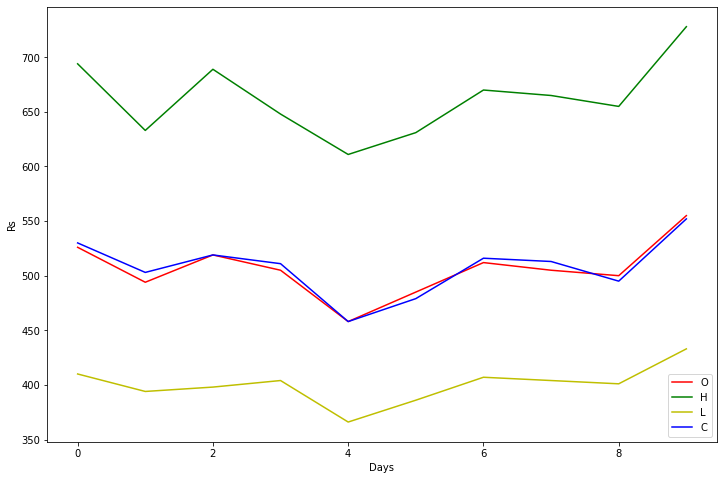

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(index.open, 'r', index.high, 'g', index.low, 'y', index.close, 'b')
plt.legend('OHLC')
plt.xlabel('Days')
plt.ylabel('₨')